In [37]:
import pandas as pd

In [38]:
import numpy as np


In [39]:
import matplotlib.pyplot as plt

In [40]:
from tkinter import filedialog

In [41]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv', low_memory=False)

In [42]:
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02,view,5802432,1487580009286590000,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09,cart,5844397,1487580006317030000,NaN,NaN,2.38 sale,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10,view,5837166,1783999064103190000,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11,cart,5876812,1487580010100290000,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24,remove_from_cart,5826182,1487580007483040000,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb


### display the column names

In [43]:
column_names = data.columns

In [44]:
column_names

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

# Q1

### Sorting the data by the user's ID, session number and time

In [45]:
data.sort_values(['user_id', 'user_session', 'event_time'], inplace=True)

In [46]:
#data.head(5)

In [47]:
data['event_time'] = pd.to_datetime(data['event_time'])

### Know we will group the data by the user's unique details

In [48]:
grouped_data = data.groupby(['user_id', 'user_session'])

In [49]:
#grouped_data.head(5)

### Calculate the duration between consecutive events in each session

In [50]:
data['duration_to_next_event'] = grouped_data['event_time'].shift(-1) - data['event_time']

### For the last event in each session, fill the duration with 0

In [51]:
data.loc[grouped_data['event_time'].shift(-1).isna(), 'duration_to_next_event'] = pd.Timedelta(seconds=0)

### Convert the duration to seconds

In [52]:
#data['duration_to_next_event'] = data['duration_to_next_event'].astype(str)

In [53]:
data['duration_to_next_event'] = pd.to_timedelta(data['duration_to_next_event']).dt.total_seconds()

In [54]:
#data['duration_to_next_event'] = data['duration_to_next_event'].dt.total_seconds()

In [55]:
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0


##### You can see that we did get a column that shows the seconds between each transaction.
##### You can also see that there are two transactions of the same user that have been created at the same second, therefore there are two rows with the value 0 for the same user

# Q2

#### Creating a column that calculates the gap between every session of a user

In [56]:
data['session_gap'] = data.groupby('user_id')['event_time'].diff().fillna(pd.Timedelta(seconds=0))

#### We will create the 'funnel_number' column that checks if the 'session_gap' is greater than 5. If so, we will use the cumsum() method to sum the previous panels of the user and add 1 to start the counting from 1 instead of 0.

In [57]:
data['funnel_number'] = (data['session_gap'] > pd.Timedelta(days=5)).cumsum() + 1

In [58]:
data = data.drop(['session_gap'], axis=1)

In [59]:
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,1
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1


# Q3

#### I am grouping the data by user_id and funnel_number, this way the cumcount() could do an index that take in account alsow the user and the funnel.

In [60]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount() + 1

In [61]:
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,1,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,1,2
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1,3
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1,4


# Q4

In [62]:
import re

In [63]:
data['price'] = data['price'].str.replace(r'[^\d\.]+', '', regex=True).astype(float)

In [64]:
data.head(5)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57,view,5240,1487580009202710000,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0,1,1
697519,2019-11-06 10:40:34,cart,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,52.0,1,1
697645,2019-11-06 10:41:26,cart,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,124.0,1,2
698043,2019-11-06 10:43:30,purchase,5766379,1783999067156640000,NaN,kaaral,12.25,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1,3
698045,2019-11-06 10:43:30,purchase,5614842,1487580005411060000,NaN,cnd,13.56,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,0.0,1,4


In [65]:
#for i, val in enumerate(data['price']):
    #if not val.isnumeric():
       # print(f"Invalid value '{val}' at index {i}")


# Q5

In [66]:
event_types = data['event_type'].unique()

In [67]:
event_counts = data['event_type'].value_counts()

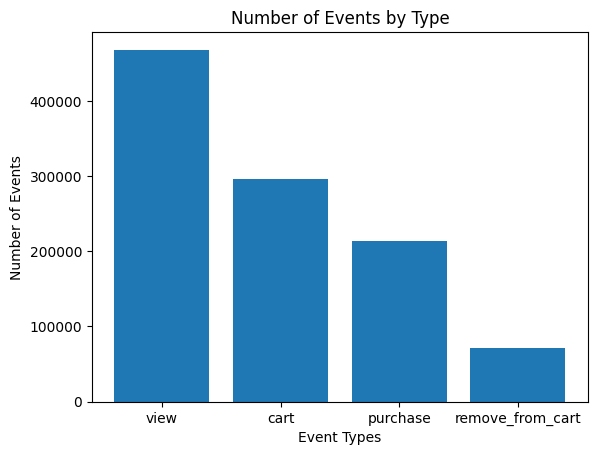

In [68]:
plt.bar(event_types, event_counts)
plt.xlabel('Event Types')
plt.ylabel('Number of Events')
plt.title('Number of Events by Type')
plt.show()

# Q6

In [69]:
session_data = data.groupby(['user_id', 'user_session', 'funnel_number', 'index_in_funnel']).agg(
    num_events=('event_type', 'count'),
    duration=('duration_to_next_event', 'sum'),
    list_of_viewed=('product_id', lambda x: list(x[x.notnull()])),
    list_of_added_to_cart=('product_id', lambda x: list(x[x == 'cart'].index)),
    list_of_purchased=('product_id', lambda x: list(x[x == 'purchase'].index))
).reset_index()


In [70]:
session_data.head(5)

,user_id,user_session,funnel_number,index_in_funnel,num_events,duration,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1,0.0,[5240],[],[]
1,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,1,1,52.0,[5614842],[],[]
2,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,2,1,124.0,[5766379],[],[]
3,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,3,1,0.0,[5766379],[],[]
4,10079204,f873d16b-4efa-4e92-81be-92948aef2ff5,1,4,1,0.0,[5614842],[],[]
